In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
    
)


In [5]:
credited_card_df = pd.read_csv('creditcard.csv')
credited_card_df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
credited_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 267849 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22 

In [27]:
credited_card_df.shape

(984, 31)

In [28]:
credited_card_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [29]:
credited_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88207.348577,-2.330397,1.747306,-3.511564,2.262683,-1.612047,-0.692804,-2.799198,0.262705,-1.293042,...,0.349986,0.029667,-0.013679,-0.075203,0.024196,0.040859,0.098437,0.042263,109.667541,0.500000
std,47273.973421,5.566798,3.773876,6.231127,3.203094,4.319171,1.899145,5.910536,4.916197,2.316406,...,2.812998,1.178369,1.196597,0.576948,0.664645,0.474064,1.009006,0.451791,302.093170,0.500254
min,53.000000,-30.552380,-19.417372,-31.103685,-4.515824,-28.815577,-11.847387,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.315071,-7.263482,-2.180051,0.000000,0.000000
25%,49157.500000,-2.837530,-0.204368,-5.113334,-0.103903,-1.828002,-1.554881,-3.103817,-0.202834,-2.294075,...,-0.147641,-0.521657,-0.232859,-0.413858,-0.301954,-0.279377,-0.062375,-0.056069,1.372500,0.000000
50%,81369.000000,-0.697884,0.873188,-1.433128,1.348289,-0.398247,-0.634715,-0.674263,0.149234,-0.685045,...,0.143969,0.042887,-0.032053,-0.010462,0.063228,0.004186,0.046936,0.034316,18.970000,0.500000
75%,134067.500000,1.124324,2.798885,0.318742,4.235097,0.417495,0.083040,0.226188,0.867939,0.174990,...,0.662005,0.614052,0.194093,0.371447,0.388778,0.352031,0.434682,0.219693,99.990000,1.000000
max,172599.000000,2.356745,22.057729,3.368643,12.114672,19.440928,21.190194,26.249717,20.007208,6.928959,...,27.202839,8.361985,9.143317,1.251195,2.208209,2.745261,5.058448,4.927820,5918.000000,1.000000


In [30]:
legit= credited_card_df[credited_card_df.Class == 0]
fraud= credited_card_df[credited_card_df.Class == 1] 

In [32]:
legit.shape

(492, 31)

In [31]:
fraud.shape

(492, 31)

In [33]:
legit_sample= legit.sample(n=492)
credited_card_df= pd.concat([legit_sample, fraud], axis=0)

In [34]:
credited_card_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [35]:
credited_card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95667.890244,0.111154,-0.129166,0.010153,-0.016664,-0.072868,0.012129,-0.029665,-0.045226,-0.004960,...,0.022817,-0.013616,0.045285,0.012951,-0.045276,0.006942,0.030069,0.026300,0.008858,97.123760
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [36]:
X=credited_card_df.drop(columns='Class', axis=1)
Y=credited_card_df['Class']

In [37]:
X.shape
Y.shape

(984,)

In [38]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [39]:
model = LogisticRegression(max_iter=10000)

model.fit(X_train, Y_train)
ypred=model.predict(X_test)

In [40]:
accuracy_score(Y_test, ypred)

0.9390862944162437

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, ypred))


[[97  2]
 [10 88]]


In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, ypred)


0.9388785817357247

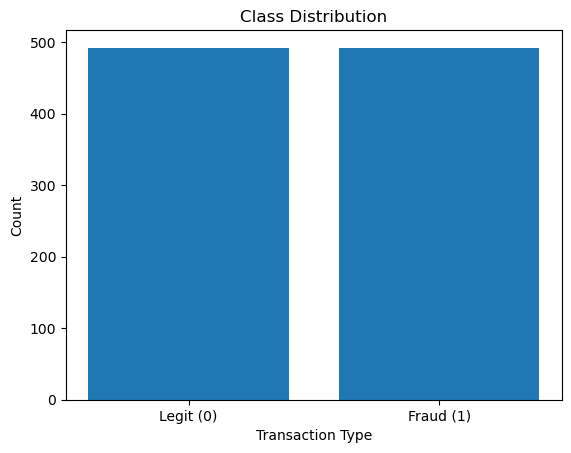

In [43]:
counts = credited_card_df['Class'].value_counts()

plt.figure()
plt.bar(['Legit (0)', 'Fraud (1)'], counts)
plt.title("Class Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


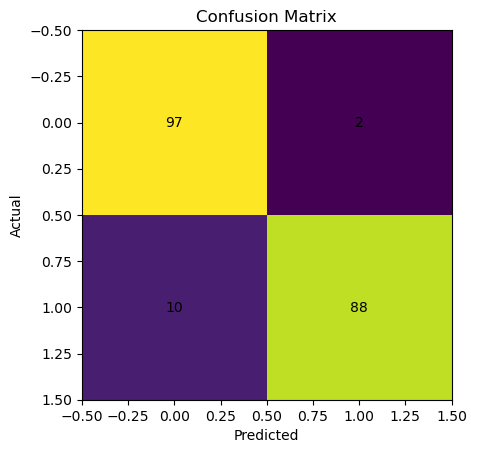

In [44]:
cm = confusion_matrix(Y_test, model.predict(X_test))

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()
